# EVN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [2]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

## Vocabulary

In [3]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [4]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [5]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [6]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [7]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [8]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [9]:
# train inputs을 numpy array로 변환
np.array(train_inputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([2, 3, 4, 5]), list([2, 3, 6])], dtype=object)

In [10]:
# train labels을 numpy array로 변환
np.array(train_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([1, 1, 1, 2]), list([1, 1, 0])], dtype=object)

In [11]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [12]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [13]:
# 정답 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_labels:
    row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [14]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

In [15]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[ 0.04374888, -0.02695637,  0.03477769, -0.02533014,
         -0.02002218,  0.02743245, -0.00554616, -0.02809668],
        [ 0.04138905,  0.00650503,  0.03023777, -0.02226757,
          0.0496711 ,  0.02751691, -0.0376732 ,  0.02125088],
        [ 0.01175606, -0.0353846 , -0.04599231, -0.03975756,
         -0.04463566,  0.02648574, -0.02421007,  0.04571467],
        [-0.02820928, -0.04888053,  0.00251884,  0.02087611,
          0.00471951,  0.03571105, -0.04827252,  0.01586714]],

       [[ 0.04374888, -0.02695637,  0.03477769, -0.02533014,
         -0.02002218,  0.02743245, -0.00554616, -0.02809668],
        [ 0.04138905,  0.00650503,  0.03023777, -0.02226757,
          0.0496711 ,  0.02751691, -0.0376732 ,  0.02125088],
        [-0.0459582 , -0.02130589,  0.04951811,  0.03602416,
         -0.02606739, -0.0083807 ,  0.03980811, -0.01368165],
        [-0.01708784, -0.03903384,  0.0320017 ,  0.01255358,
         -0.03411334,  0.

In [16]:
# embedding weight
weight = embedding.get_weights()[0]
weight

array([[-0.01708784, -0.03903384,  0.0320017 ,  0.01255358, -0.03411334,
         0.00239635, -0.01040394, -0.02570447],
       [ 0.04729453,  0.03421826,  0.00815267, -0.01175495,  0.01373944,
         0.0054695 , -0.03022561, -0.02225592],
       [ 0.04374888, -0.02695637,  0.03477769, -0.02533014, -0.02002218,
         0.02743245, -0.00554616, -0.02809668],
       [ 0.04138905,  0.00650503,  0.03023777, -0.02226757,  0.0496711 ,
         0.02751691, -0.0376732 ,  0.02125088],
       [ 0.01175606, -0.0353846 , -0.04599231, -0.03975756, -0.04463566,
         0.02648574, -0.02421007,  0.04571467],
       [-0.02820928, -0.04888053,  0.00251884,  0.02087611,  0.00471951,
         0.03571105, -0.04827252,  0.01586714],
       [-0.0459582 , -0.02130589,  0.04951811,  0.03602416, -0.02606739,
        -0.0083807 ,  0.03980811, -0.01368165]], dtype=float32)

In [17]:
# numpy를 이용해서 직접 조회 (두 결과값 비교)
weight[train_inputs], hidden

(array([[[ 0.04374888, -0.02695637,  0.03477769, -0.02533014,
          -0.02002218,  0.02743245, -0.00554616, -0.02809668],
         [ 0.04138905,  0.00650503,  0.03023777, -0.02226757,
           0.0496711 ,  0.02751691, -0.0376732 ,  0.02125088],
         [ 0.01175606, -0.0353846 , -0.04599231, -0.03975756,
          -0.04463566,  0.02648574, -0.02421007,  0.04571467],
         [-0.02820928, -0.04888053,  0.00251884,  0.02087611,
           0.00471951,  0.03571105, -0.04827252,  0.01586714]],
 
        [[ 0.04374888, -0.02695637,  0.03477769, -0.02533014,
          -0.02002218,  0.02743245, -0.00554616, -0.02809668],
         [ 0.04138905,  0.00650503,  0.03023777, -0.02226757,
           0.0496711 ,  0.02751691, -0.0376732 ,  0.02125088],
         [-0.0459582 , -0.02130589,  0.04951811,  0.03602416,
          -0.02606739, -0.0083807 ,  0.03980811, -0.01368165],
         [-0.01708784, -0.03903384,  0.0320017 ,  0.01255358,
          -0.03411334,  0.00239635, -0.01040394, -0.02570447

In [18]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.33242443, 0.32719043, 0.34038517],
        [0.31904498, 0.32573447, 0.35522053],
        [0.32907003, 0.33909923, 0.3318308 ],
        [0.341263  , 0.32962078, 0.32911626]],

       [[0.33242443, 0.32719043, 0.34038517],
        [0.31904498, 0.32573447, 0.35522053],
        [0.3448188 , 0.3394387 , 0.3157425 ],
        [0.34654915, 0.3290687 , 0.3243822 ]]], dtype=float32)>

In [19]:
# dense의 wieght, bias
weight, bias = linear.get_weights()
weight, bias

(array([[-0.10858297,  0.14052647,  0.65414196],
        [-0.08125299,  0.02131194,  0.55782574],
        [-0.15045112, -0.2105189 ,  0.09061044],
        [ 0.37652344,  0.08398336, -0.21915883],
        [-0.0010609 ,  0.21781987,  0.53872865],
        [ 0.22651154,  0.38176054,  0.49842757],
        [-0.2834669 ,  0.48454827, -0.45790625],
        [-0.46713462,  0.42057294,  0.01574117]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [20]:
# numpy를 이용한 xW + b
logits = np.matmul(hidden, weight) + bias
logits

array([[[ 0.00360226, -0.01226797,  0.02726749],
        [-0.01102398,  0.00972645,  0.09638272],
        [-0.01489693,  0.01512528, -0.00654221],
        [ 0.02887165, -0.00583891, -0.00737069]],

       [[ 0.00360226, -0.01226797,  0.02726749],
        [-0.01102398,  0.00972645,  0.09638272],
        [ 0.00607155, -0.00965408, -0.08202048],
        [ 0.0204747 , -0.0312834 , -0.04562751]]], dtype=float32)

In [21]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
denominator = np.sum(numerator, axis=2, keepdims=True)
numerator, denominator

(array([[[1.0036087 , 0.987807  , 1.0276427 ],
         [0.98903656, 1.009774  , 1.1011804 ],
         [0.98521346, 1.0152402 , 0.9934791 ],
         [1.0292926 , 0.9941781 , 0.99265635]],
 
        [[1.0036087 , 0.987807  , 1.0276427 ],
         [0.98903656, 1.009774  , 1.1011804 ],
         [1.00609   , 0.99039245, 0.921253  ],
         [1.0206858 , 0.96920085, 0.95539784]]], dtype=float32),
 array([[[3.0190585],
         [3.0999908],
         [2.9939327],
         [3.016127 ]],
 
        [[3.0190585],
         [3.0999908],
         [2.9177356],
         [2.9452844]]], dtype=float32))

In [22]:
# 두 결과값 비교
probs = numerator / denominator
probs, outputs

(array([[[0.3324244 , 0.3271904 , 0.34038517],
         [0.319045  , 0.3257345 , 0.35522056],
         [0.32907   , 0.3390992 , 0.3318308 ],
         [0.341263  , 0.32962075, 0.32911623]],
 
        [[0.3324244 , 0.3271904 , 0.34038517],
         [0.319045  , 0.3257345 , 0.35522056],
         [0.3448188 , 0.33943874, 0.31574246],
         [0.34654915, 0.3290687 , 0.32438222]]], dtype=float32),
 <tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
 array([[[0.33242443, 0.32719043, 0.34038517],
         [0.31904498, 0.32573447, 0.35522053],
         [0.32907003, 0.33909923, 0.3318308 ],
         [0.341263  , 0.32962078, 0.32911626]],
 
        [[0.33242443, 0.32719043, 0.34038517],
         [0.31904498, 0.32573447, 0.35522053],
         [0.3448188 , 0.3394387 , 0.3157425 ],
         [0.34654915, 0.3290687 , 0.3243822 ]]], dtype=float32)>)

In [23]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    # 여기에 CNN 및 RNN 모델을 추가해 보세요.
    rnn_1 = tf.keras.layers.SimpleRNN(units=128, return_sequences=True)
    hidden = rnn_1(hidden)
    rnn_2 = tf.keras.layers.SimpleRNN(units=128, return_sequences=True)
    hidden = rnn_2(hidden)
    #######################################
    # 단어의 vector를 이용해서 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden)  # (bs, n_seq, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

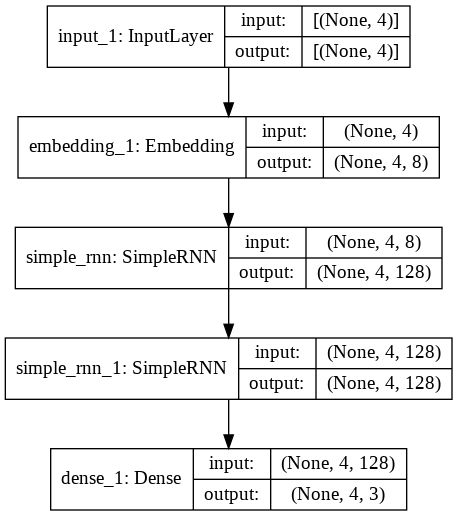

In [24]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [25]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.1083 - accuracy: 0.1250
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0645 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0228 - accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.9812 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9387 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8951 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.8512 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8080 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7657 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7232 - accuracy: 0.7500
Epoch 11/100
1/1 [========

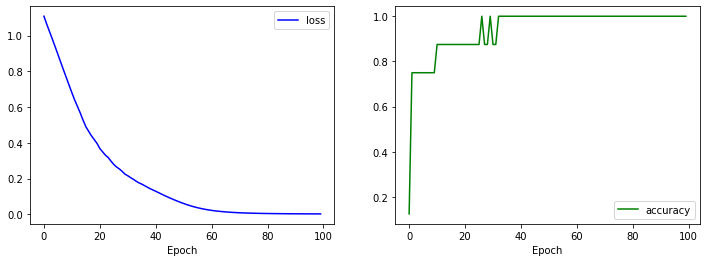

In [27]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [28]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 285ms/step - loss: 0.0020 - accuracy: 1.0000


[0.0020127573516219854, 1.0]

## 예측

In [29]:
# 추론할 입력
string = '나는 기분이 우울해'

In [30]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [31]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [32]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [33]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[[1.1399193e-03, 9.9770749e-01, 1.1526106e-03],
        [6.1466835e-07, 9.9999821e-01, 1.1399933e-06],
        [9.8416221e-01, 2.3322078e-05, 1.5814476e-02],
        [1.8319161e-05, 9.9988484e-01, 9.6736330e-05]]], dtype=float32)

In [34]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 1]])

In [35]:
# 각 예측 값에 대한 label string
for row in y_pred_class:
    for val in row:
        print(val, ':', id_to_label[val])

1 : 중립
1 : 중립
0 : 부정
1 : 중립


# 문장 긍정(1), 부정(0) 분류 프로젝트

## 데이터

In [36]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [1, 0]  # 긍정(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '긍정'}

## Vocabulary

In [37]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [38]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [39]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [40]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [41]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [42]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[1, 0]

In [43]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [44]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [45]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([1, 0])

## 모델링

In [46]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[ 0.04173836, -0.03046945,  0.00309604,  0.03311678,
          0.00990339,  0.00926088, -0.04484629,  0.03495969],
        [-0.02737695,  0.02437632,  0.0352576 , -0.04048409,
          0.04245498, -0.02803956,  0.04661621, -0.01815774],
        [-0.02087724, -0.02670374, -0.03846987, -0.00971853,
          0.03721471, -0.00666039,  0.02420912,  0.0293877 ],
        [ 0.01023496,  0.04245165,  0.04267856, -0.00159175,
          0.04528247,  0.04017777, -0.01961046,  0.00332432]],

       [[ 0.04173836, -0.03046945,  0.00309604,  0.03311678,
          0.00990339,  0.00926088, -0.04484629,  0.03495969],
        [-0.02737695,  0.02437632,  0.0352576 , -0.04048409,
          0.04245498, -0.02803956,  0.04661621, -0.01815774],
        [-0.01728524, -0.01356212, -0.01533837, -0.00123855,
         -0.01567359,  0.02337864,  0.01217045, -0.02920075],
        [-0.03632488, -0.04863989, -0.00507877,  0.02630391,
         -0.00446881, -0.

In [47]:
# 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
pool = tf.keras.layers.GlobalMaxPool1D()
hidden_pool = pool(hidden)
hidden_pool

<tf.Tensor: shape=(2, 8), dtype=float32, numpy=
array([[0.04173836, 0.04245165, 0.04267856, 0.03311678, 0.04528247,
        0.04017777, 0.04661621, 0.03495969],
       [0.04173836, 0.02437632, 0.0352576 , 0.03311678, 0.04245498,
        0.02337864, 0.04661621, 0.03495969]], dtype=float32)>

In [48]:
# 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
outputs = linear(hidden_pool)
outputs

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.467953  , 0.532047  ],
       [0.47570914, 0.5242908 ]], dtype=float32)>

In [53]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    # 여기에 CNN 및 RNN 모델을 추가해 보세요.
    conv_1 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding='same')
    hidden = conv_1(hidden)
    conv_2 = tf.keras.layers.Conv1D(filters=64, kernel_size=3)
    hidden = conv_2(hidden)
    #######################################
    # 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
    pool = tf.keras.layers.GlobalMaxPool1D()
    hidden_pool = pool(hidden)  # (bs, d_model)
    # 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
    linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    outputs = linear(hidden_pool)  # (bs, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

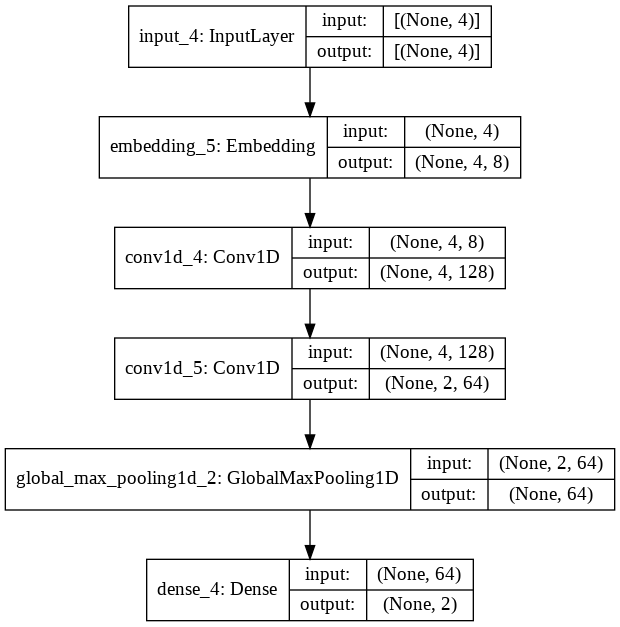

In [54]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 2)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [55]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=20, batch_size=16)

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 0.6848 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6621 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6384 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6257 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6121 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 5ms/step - loss: 0.5971 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 5ms/step - loss: 0.5809 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 6ms/step - loss: 0.5642 - accuracy: 1.0000
Epoch 11/20
1/1 [=======================

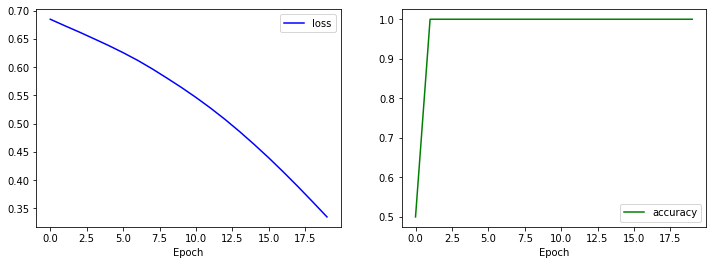

In [57]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [58]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 117ms/step - loss: 0.3076 - accuracy: 1.0000


[0.3075929284095764, 1.0]

## 예측

In [59]:
# 추론할 입력
string = '나는 기분이 우울해'

In [60]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [62]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [63]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [64]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[0.6699442 , 0.33005577]], dtype=float32)

In [65]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=1)
y_pred_class

array([0])

In [66]:
# 각 예측 값에 대한 label string
for val in y_pred_class:
    print(val, ':', id_to_label[val])

0 : 부정
